In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Գրադարանների ներբեռնում:

Տվյալների ներմուծում

In [72]:
import pandas as pd

url = "https://raw.githubusercontent.com/nalqnarik/Qnarik_Naltakyan_mid_term/refs/heads/main/hotel_bookings.csv"
df = pd.read_csv(url)

#Տվյալների ներբեռնում
#Տվյալները ներբեռնվել են GitHub repository-ից RAW հղման միջոցով։

#Տվյալների հավաքածուն վերաբերում է հյուրանոցային ամրագրումներին
#և պարունակում է թե՛ քանակական, թե՛ որակական հատկանիշներ։
#Տվյալները օգտագործվել են ուսումնասիրելու ամրագրումների վարքագիծը,
#չեղարկումները, սեզոնայնությունը և հաճախորդների բնութագրերը։

# Տվյալների EDA

In [73]:
df.shape
#Ունենք տվյալների աղյուսակ բաղկացած 119390 տողից և 32 սյունից

(119390, 32)

In [74]:
df.info()
#Կարող ենք տեսնել տվյալների կառուցվածքը:
#Տեսնում ենք սյուների տվյալների տեսակները և բացակայող արժեքների առկայությունը:
#Տեսնում ենք որ կան և որակական և քանակակն հատկանիշներ նաև կան բացակայող արժեքներ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numeric_cols, categorical_cols

#Առանձնացնենք որակական և քանակական սյուները:
#Քանակական հատկանիշները հիմնականում նկարագրում են ամրագրումների
#քանակական բնութագրերը, իսկ որակականները՝ հյուրանոցի, ամսաթվի և
#հյուրերի հետ կապված տեղեկատվություն։

(Index(['is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
        'babies', 'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests'],
       dtype='object'),
 Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
        'distribution_channel', 'reserved_room_type', 'assigned_room_type',
        'deposit_type', 'customer_type', 'reservation_status',
        'reservation_status_date'],
       dtype='object'))

In [76]:
df.isnull().sum().sort_values(ascending=False)

#Սյուներում բաց թողնված տվյալների քանակը

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [77]:
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent

#Բաց թողնված տվյալների տոկոսը սյուներում:

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
arrival_date_month,0.000000
arrival_date_week_number,0.000000
hotel,0.000000
is_canceled,0.000000
stays_in_weekend_nights,0.000000
arrival_date_day_of_month,0.000000


In [78]:
missing_percent[missing_percent > 0]

#Այն սյուները որտեղ կան բացակայող տվյալներ դրանց տոկոսները:

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


Քանակական սյուների վերլուծություն

In [79]:
df.describe()

#Քանական սյուների ընդհանուր վիճակագրական տվյալները:
#Վիճակագրական ամփոփումը ցույց է տալիս, որ որոշ հատկանիշներում առկա են
#մեծ տատանումներ և արտածայր արժեքներ:

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [80]:
df["lead_time"].describe()

#Դիտարկենք կոնկրետ սյուն:
#Lead_time սյունը ցույց է տալիս ամրագրումից մինչև ժամանում ընկած օրերի քանակը։
#Տեսնում ենք որ կան մարդիկ ովքեր բավականին շուտ են կատարում ամրագրումը:

,lead_time
count,119390.000000
mean,104.011416
std,106.863097
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


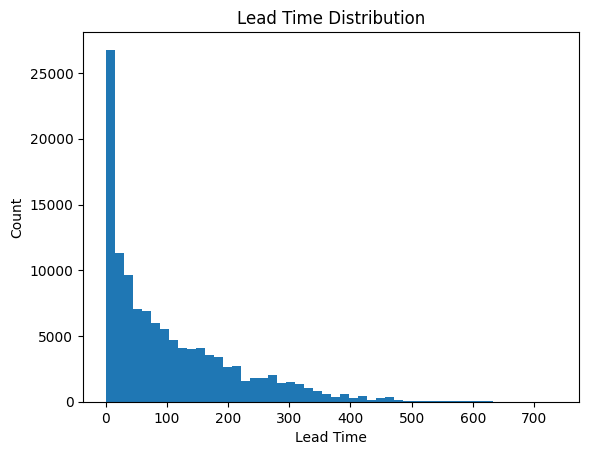

In [81]:
plt.hist(df["lead_time"], bins=50)
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.title("Lead Time Distribution")
plt.show()

#Lead_time սյան տվյալների հիստոգրամը:
#Տեսնում ենք, որ մեծամասամբ ամրագրումները կատարվում են ժամանումից ոչ այդքան շուտ:

In [82]:
df["adr"].describe()

#adr-ը average daily rate
#Տեսնում ենք որ կան բացասական գնահատումներ ինչպես նաև չափազանց մեծ:

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


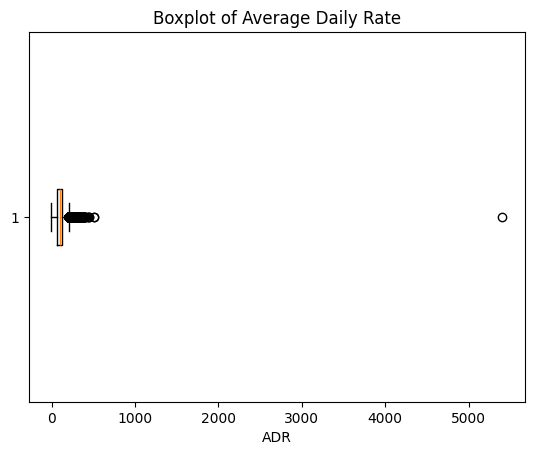

In [83]:
plt.boxplot(df["adr"], vert=False)
plt.xlabel("ADR")
plt.title("Boxplot of Average Daily Rate")
plt.show()

#Boxplot-ից երևում է, որ adr հատկանիշը պարունակում է արտածայր արժեքներ,
#ինչը կարող է ազդել միջին արժեքի վրա։
#Տեսնում ենք մեկ առանաձնացող տվյալ:

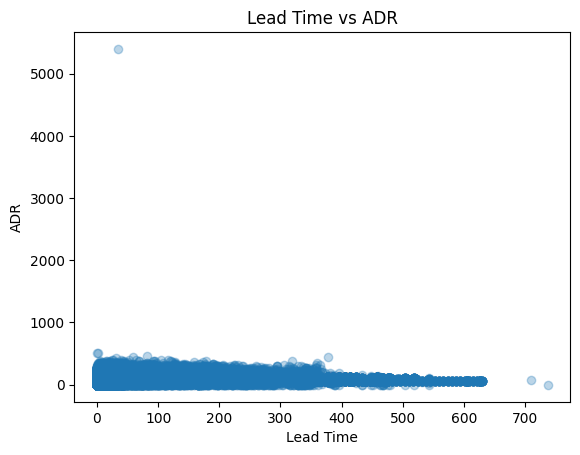

In [84]:
plt.scatter(df["lead_time"], df["adr"], alpha=0.3)
plt.xlabel("Lead Time")
plt.ylabel("ADR")
plt.title("Lead Time vs ADR")
plt.show()

#Scatterplot-ը ցույց է տալիս, որ lead_time և adr հատկանիշների միջև
#հստակ գծային կախվածություն չի նկատվում, սակայն առկա է մեծ ցրվածություն։

Որակական սյուների վերլուծություն

In [85]:
df[categorical_cols].nunique().sort_values(ascending=False)

#Յուրահատուկ արժեքների քանակը որակական սյուներում:
#Որակական սյուները ունեն տարբեր cardinality․ որոշ սյուներ պարունակում են
#սահմանափակ քանակի կատեգորիաներ, իսկ որոշները՝ շատ մեծ բազմազանություն։

,0
reservation_status_date,926
country,177
assigned_room_type,12
arrival_date_month,12
reserved_room_type,10
market_segment,8
distribution_channel,5
meal,5
customer_type,4
deposit_type,3


In [86]:
df["hotel"].value_counts()
#Դիտարկենք կոնկրետ սյուն:
#hotel սյան յուրահատուկ արժեքների կրկնությունների քանակը:
#Տեսնում ենք որ տվյալները տրված են երկու հյուրանոցների համար
#և տեսնում ենք թե ամեն մեկի համար քանի ամրագրում է եղել:

,count
hotel,
City Hotel,79330
Resort Hotel,40060


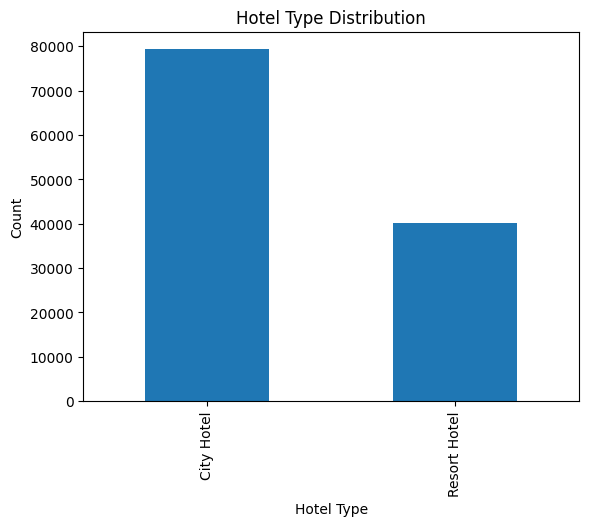

In [87]:
df["hotel"].value_counts().plot(kind="bar")
plt.title("Hotel Type Distribution")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()

#Տեսնում ենք, որ տվյալների մեծ մասը վերաբերում է City Hotel տիպի հյուրանոցներին։

In [88]:
#Տվյալների հետազոտական վերլուծության (EDA) արդյունքում պարզվեց, որ
#տվյալների հավաքածուն պարունակում է ինչպես քանակական, այնպես էլ
#որակական հատկանիշներ, ինչպես նաև բաց թողնված արժեքներ։

#Քանակական հատկանիշների բաշխումների ուսումնասիրությունը ցույց տվեց,
#որ որոշ սյուներում առկա են ոչ սիմետրիկ բաշխումներ և արտածայր արժեքներ
#(օրինակ՝ lead_time և adr), ինչը կարևոր է հետագա վերլուծության համար։

#Boxplot-երի միջոցով հայտնաբերվեցին արտածայր արժեքներ, որոնք կարող են
#ազդել միջին արժեքների վրա։

#Scatterplot-երը ցույց տվեցին, որ որոշ քանակական հատկանիշների միջև
#հստակ գծային կախվածություն չի նկատվում, սակայն առկա է մեծ ցրվածություն։

#Որակական հատկանիշների վերլուծությունը ցույց տվեց, որ որոշ կատեգորիաներ
#գերակշռում են տվյալների մեջ, ինչը կարող է ազդել արդյունքների
#ընդհանրացման վրա։


# Տվյալների մաքրում

In [89]:
df.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [90]:
missing_percent[missing_percent > 0]

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


In [91]:
df.duplicated().sum()

#Գտնենք ամբողջությամբ կրկնվող տողերի քանակը

np.int64(31994)

In [92]:
df = df.drop_duplicates()

#Կարող ենք հեռացնել կրկնվող տողերը թողելով միայն մեկական:
#Սա նվազեցնում է տվյալների կրկնակի հաշվառման ռիսկը և բարձրացնում է
#հետագա վերլուծության ու մոդելավորման արդյունքների վստահելիությունը։

In [93]:
df.shape

(87396, 32)

In [94]:
df["children"] = df["children"].fillna(0)

#Children սյան բաց թողնված արժեքները փոխարինվել են 0-ով,
#քանի որ բացակայությունը ենթադրում է երեխաների բացակայություն։

In [95]:
df["country"] = df["country"].fillna("Unknown")

#Country սյան բաց թողնված արժեքները լրացվել են «Unknown»,
#քանի որ իրական արժեքը հնարավոր չէ վերականգնել։

In [96]:
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)

#Agent և company սյուների բաց թողնված արժեքները փոխարինվել են 0-ով,
#որը նշանակում է, որ տվյալ ամրագրումը չի կատարվել գործակալի կամ ընկերության միջոցով։

In [97]:
df = df[(df["adults"] + df["children"] + df["babies"]) > 0]

#Հեռացվել են այն ամրագրումները, որոնցում հյուրերի ընդհանուր քանակը 0 է,
#քանի որ դրանք տրամաբանական սխալ են։

In [98]:
df = df.drop(columns=["company"])

#Company սյունը կարող ենք հեռացնել, քանի որ բաց թողնված արժեքների
#տոկոսը գերազանցում է 90%-ը, ինչը տվյալ հատկանիշը դարձնում է
#ոչ տեղեկատվական տվյալների մեծ մասի համար։

# Feature engineering

In [99]:
df["total_nights"] = (df["stays_in_weekend_nights"] + df["stays_in_week_nights"])

#Կարող ենք ստեղծել նոր սյուն, որտեղ կլինի հյուրանոցում
#հյուրոերի անցկացված ընդհանուր ժամանակը:

In [100]:
df["total_nights"].describe()

,total_nights
count,87230.000000
mean,3.628534
std,2.742948
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,69.000000


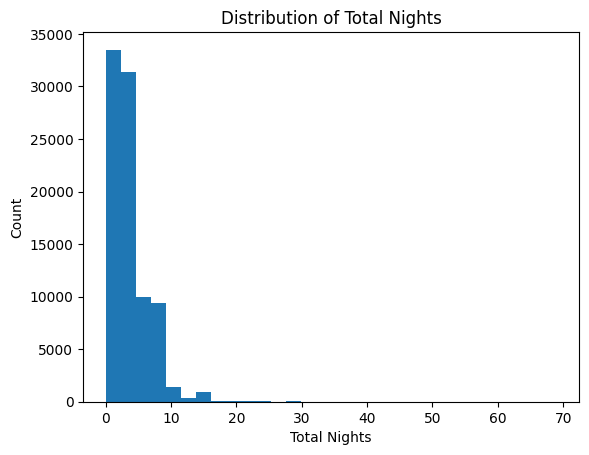

In [101]:
plt.hist(df["total_nights"], bins=30)
plt.xlabel("Total Nights")
plt.ylabel("Count")
plt.title("Distribution of Total Nights")
plt.show()

#Կարող ենք տեսնել, որ հյուրերի մեծ մասը մնում է կարճ ժամանակով։

In [102]:
df["total_guests"] = (df["adults"] + df["children"].fillna(0) + df["babies"])

#Total_guests հատկանիշը ներկայացնում է մեկ ամրագրումով հյուրերի ընդհանուր թիվը։

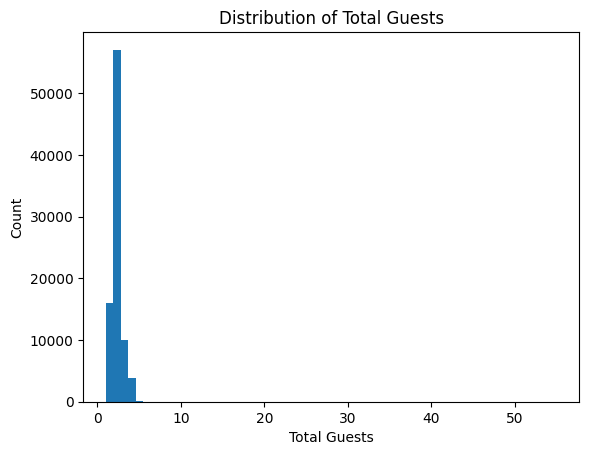

In [103]:
plt.hist(df["total_guests"], bins=60)
plt.xlabel("Total Guests")
plt.ylabel("Count")
plt.title("Distribution of Total Guests")
plt.show()

#Գրաֆիկից երևում է, որ գերակշռում են 1–2 հյուրով ամրագրումները։

In [104]:
df["is_canceled_flag"] = df["is_canceled"].map({0: "No", 1: "Yes"})

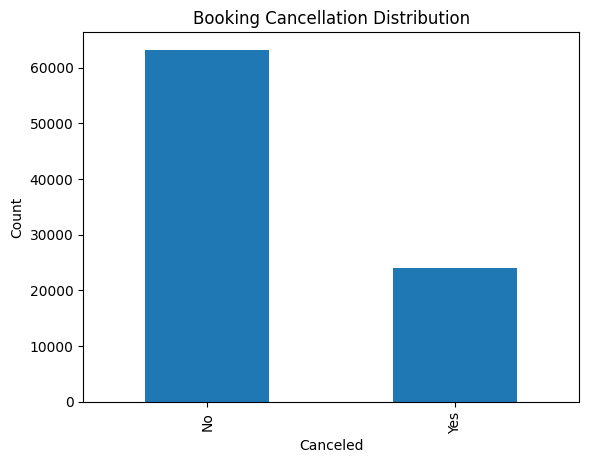

In [105]:
df["is_canceled_flag"].value_counts().plot(kind="bar")
plt.xlabel("Canceled")
plt.ylabel("Count")
plt.title("Booking Cancellation Distribution")
plt.show()

#Ստեղծված is_canceled_flag հատկանիշը հեշտացնում է չեղարկումների
#վիզուալ և մեկնաբանական վերլուծությունը։

In [106]:
hotel_dummies = pd.get_dummies(df["hotel"], prefix="hotel")
df = pd.concat([df, hotel_dummies], axis=1)

#Hotel որակական հատկանիշի համար կիրառվել է one-hot encoding,
#որի արդյունքում ստեղծվել են նոր քանակական սյուներ։

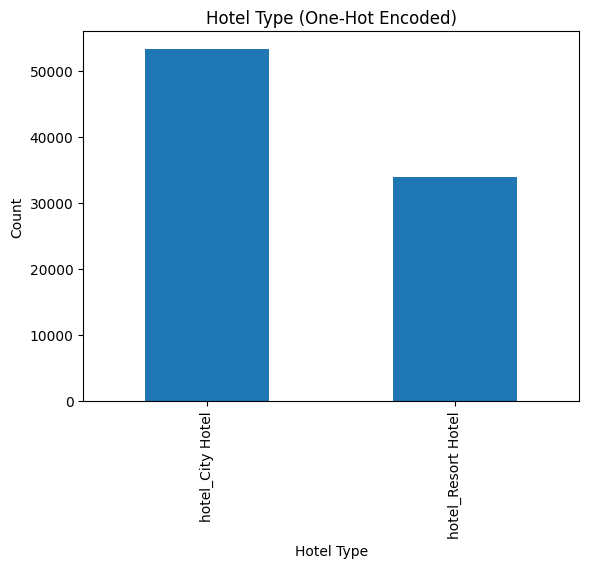

In [107]:
df[["hotel_City Hotel", "hotel_Resort Hotel"]].sum().plot(kind="bar")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.title("Hotel Type (One-Hot Encoded)")
plt.show()

#One-hot encoding-ից հետո ստացված սյուների ամփոփումը ցույց է տալիս,
#որ City Hotel տիպի ամրագրումները գերակշռում են տվյալների մեջ։

In [108]:
#Feature engineering-ի ընթացքում ստեղծվել են նոր հատկանիշներ,
#որոնք ավելի ամբողջական են ներկայացնում ամրագրման բնութագրերը։
#Ստացված հատկանիշները կարող են օգտագործվել հետագա վերլուծությունների
#կամ մոդելավորման փուլերում։